In [ ]:
import numpy as np

# dimer
# ref
# converged SCF energy = -152.062490646908
# E(RCCSD) = -152.4871100510431  E_corr = -0.4246194041124972
# AFQMC/CCSD_PT2 energy (direct obs): -152.494942 +/- 0.000129
# total run time: 158.01

hf = -152.062490646908
dm_ref_ccsd = -0.4246194041124972
dm_ref_afqmc = -152.494942 - hf
dm_ref_afqmc_err = 0.000129

data = '''
#   thresh      MP2            CCSD             AFQMC/CCSD_PT2             mp2_cr        time
    1e-5    -0.40447817     -0.42315983     -0.430528 +/- 0.000165      -0.00162081     298.41
    3e-6    -0.40558759     -0.42418970     -0.431521 +/- 0.000155      -0.00051139     327.93
    1e-6    -0.40587650     -0.42445107     -0.431927 +/- 0.000169      -0.00022248     332.49
    3e-7    -0.40606584     -0.42460093     -0.432119 +/- 0.000181      -0.00003313     362.70
#   ref     -0.40609898     -0.42461940     -0.432451 +/- 0.000129       0.00000000     158.01
'''

thresh = []
dm_mp2 = []
dm_ccsd = []
dm_afqmc = []
dm_afqmc_err = []
dm_mp2cr = []
for line in data.splitlines():
    if not line.startswith('#') and len(line)>0:
        parts = line.split()
        thresh = np.hstack((thresh,[float(parts[0])]))
        dm_mp2 = np.hstack((dm_mp2,[float(parts[1])]))
        dm_ccsd = np.hstack((dm_ccsd,[float(parts[2])]))
        dm_afqmc = np.hstack((dm_afqmc,[float(parts[3])]))
        dm_afqmc_err = np.hstack((dm_afqmc_err,[float(parts[5])]))
        dm_mp2cr = np.hstack((dm_mp2cr,[float(parts[6])]))

dm_ref_ccsd = np.array([dm_ref_ccsd]*len(dm_ccsd))
dm_ref_afqmc = np.array([dm_ref_afqmc]*len(dm_afqmc))
dm_ref_afqmc_err = dm_ref_afqmc_err * 2
dm_afqmc_err = dm_afqmc_err * 2

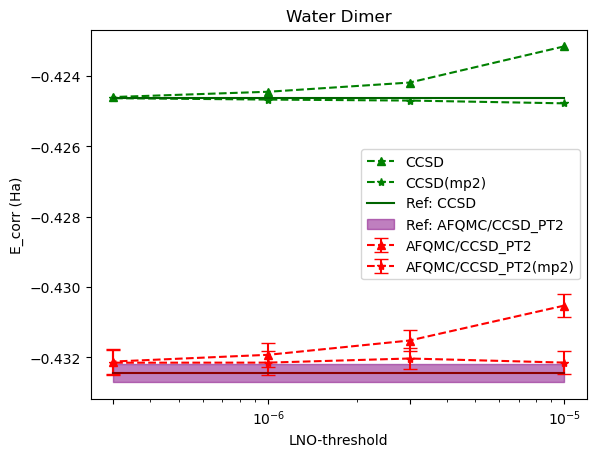

In [23]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(10, 6))
plt.plot(thresh,dm_ccsd,'^--',color='green',label='CCSD')
plt.plot(thresh,dm_ccsd+dm_mp2cr,'*--',color='green',label='CCSD(mp2)')
plt.errorbar(thresh,dm_afqmc,dm_afqmc_err,fmt='^--',capsize=5, color='red', label='AFQMC/CCSD_PT2')
plt.errorbar(thresh,dm_afqmc+dm_mp2cr,dm_afqmc_err,fmt='*--',capsize=5, color='red', label='AFQMC/CCSD_PT2(mp2)')
plt.plot(thresh,dm_ref_ccsd,'-',color='darkgreen',label='Ref: CCSD')
plt.plot(thresh,dm_ref_afqmc,'-', color='darkred')
plt.fill_between(np.linspace(thresh[0],thresh[-1],50),
                 dm_ref_afqmc[0]-dm_ref_afqmc_err,dm_ref_afqmc[0]+dm_ref_afqmc_err,
                 color='purple', alpha = 0.5, label='Ref: AFQMC/CCSD_PT2')
plt.xscale('log')
plt.xticks(thresh)
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('Water Dimer')
plt.legend()
plt.show()

In [24]:
# monomer 1
# converged SCF energy = -76.0265821108628
# E_corr(MP2) -0.144655164155928
# E(RCCSD) = -76.17717146171265  E_corr = -0.1505893508490376
# AFQMC/UCCSD_PT2 energy (direct obs): -76.179755 +/- 0.000035
# total run time: 67.43

# monomer 2
# converged SCF energy = -76.0266894617759
# E_corr(MP2) -0.144559508549431
# E(RCCSD) = -76.17718176020618  E_corr = -0.1504922984296421
# AFQMC/UCCSD_PT2 energy (direct obs): -76.179799 +/- 0.000035